In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importing the built-in libraries
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv("Information (2).csv",engine='python')    # Reading the dataframe
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,‰ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [3]:
#To find duplicates
df.duplicated().sum()

0

In [4]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
#Drop unrequired columns
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at',  'profile_yn','profile_yn:confidence', 
        'created', 'fav_number','gender_gold', 
        'profile_yn_gold', 'profileimage','retweet_count', 'sidebar_color',  'tweet_coord', 
        'tweet_count','tweet_created', 'tweet_id','tweet_location','user_timezone'],
        inplace=True,axis=1)
df.head(5)

,gender,gender:confidence,description,link_color,name,text
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,Robbie E Responds To Critics After Win Against...
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...
2,male,0.6625,louis whining and squealing and all,ABB8C2,lwtprettylaugh,i absolutely adore when louis starts the songs...
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,Hi @JordanSpieth - Looking at the url - do you...
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,Watching Neighbours on Sky+ catching up with t...


In [6]:
#Null values
df.isnull().sum() 

gender                 97
gender:confidence      26
description          3744
link_color              0
name                    0
text                    0
dtype: int64

In [7]:
#Dropping null values
df.dropna(subset=['gender'],inplace=True)
df.dropna(subset=['link_color'],inplace=True)
df.dropna(subset=['name'],inplace=True)

In [8]:
df.isnull().sum()

gender                  0
gender:confidence       0
description          3729
link_color              0
name                    0
text                    0
dtype: int64

In [9]:
df['description']=df.description.fillna("None")

In [10]:
df.isnull().sum()

gender               0
gender:confidence    0
description          0
link_color           0
name                 0
text                 0
dtype: int64

In [11]:
#finding out the rows which are most confident about gender
df=df[df['gender:confidence']==1] 

In [12]:
df.drop(columns=['gender:confidence'],inplace=True,axis=1)

In [13]:
df.shape

(13926, 5)

In [14]:
#Finding column with unknown values
df=df[df['gender']!='unknown'] 
df=df[df['gender']!='brand'] 

In [15]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize       # importing nltk library
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,WordNetLemmatizer
import re

In [16]:
#nltk.download()

In [17]:
#Finding out stopwords
stopwords=list(stopwords.words('english')) 

In [18]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    text1 = [lemmatizer.lemmatize(w) for w in nltk.word_tokenize(text)]
    text=" ".join(text1)
    return text

In [19]:
#cleaning of data-removing symbols,digit,underscore
def clean_data(text):
    text=re.sub("<[^>]*>"," ",text)                     
    text=re.sub("https?://[A-Za-z0-9./]+"," ",text)    
    text=re.sub("@[A-Za-z0-9_]+"," ",text)                        
    text=re.sub("#[A-Za-z0-9_]+"," ",text)               
    text=re.sub("_+"," ",text)                            
    text=re.sub("[^a-zA-z]"," ",text)                    
    text=text.lower()                                   
    word_list=word_tokenize(text)
    clean_words=[word for word in word_list if not word in stopwords ]
    text=" ".join(clean_words) 
    return text

In [20]:
df['clean_data_text']=df['text'].apply(lambda x: clean_data(x)) 
df['clean_data_description']=df['description'].apply(lambda x: clean_data(x))

In [21]:
df['clean_data_text']=df['clean_data_text'].apply(lambda x: lemmatize_text(x)) 
df['clean_data_description']=df['clean_data_description'].apply(lambda x: lemmatize_text(x))

In [22]:
from textblob import TextBlob

In [23]:
def sentiment_calc(text):
    try:
        Z=TextBlob(text).sentiment.polarity
        if(Z < 0):
            return "negative"
        if(Z > 0):
            return "positive"
        else:
            return "neutral"
    except:
        return None

df['sentiment'] = df['clean_data_description'].apply(sentiment_calc)

In [24]:
def sentiment_calc(text):
    try:
        Z=TextBlob(text).sentiment.subjectivity
        if(Z < 0):
            return "bad"
        if(Z > 0):
            return "good"
        else:
            return "normal"
    except:
        return None
df['sentiment_confidence'] = df['clean_data_description'].apply(sentiment_calc)

In [25]:
#df=df[df['sentiment_confidence']>0.5]
df

,gender,description,link_color,name,text,clean_data_text,clean_data_description,sentiment,sentiment_confidence
0,male,i sing my own rhythm.,08C2C2,sheezy0,Robbie E Responds To Critics After Win Against...,robbie e responds critic win eddie edward,sing rhythm,neutral,normal
1,male,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,‰ÛÏIt felt like they were my friends and I was...,felt like friend living story,author novel filled family drama romance,positive,good
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,Hi @JordanSpieth - Looking at the url - do you...,hi looking url use typically see advanced user,mobile guy er shazam google kleiner perkins ya...,neutral,normal
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,Watching Neighbours on Sky+ catching up with t...,watching neighbour sky catching neighbs xxx xxx,ricky wilson best frontman kaiser chief best b...,positive,good
5,female,you don't know me.,F5ABB5,monroevicious,"Ive seen people on the train with lamps, chair...",ive seen people train lamp chair tv etc,know,neutral,normal
...,...,...,...,...,...,...,...,...,...
20044,female,I Love Me...Myself....&....I,0084B4,Bigbootyyjudy_,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,need ride home practice raining hard asf,love,positive,good
20045,female,(rp),0084B4,capuletrosa,"@lookupondeath ...Fine, and I'll drink tea too...",fine drink tea love,rp,neutral,normal
20046,male,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,Greg Hardy you a good player and all but don't...,greg hardy good player get face dez bryant lea...,whatever like problem,neutral,normal
20047,male,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,You can miss people and still never want to se...,miss people still never want see,look lost follow follow heart bring brain,neutral,normal


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [27]:
df['exp'] = df['clean_data_description'].str.cat(df['clean_data_text'], sep =" ") 
df['exp1'] = df['exp'].str.cat(df['sentiment'], sep =" ")
df['exp2'] = df['exp1'].str.cat(df['sentiment_confidence'], sep =" ")
df['exp3'] = df['exp2'].str.cat(df['link_color'], sep =" ")
df['exp4'] = df['exp3'].str.cat(df['name'], sep =" ")

In [28]:
X = cv.fit_transform(df['exp4'])
Y =(df['gender'])

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [30]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7515, 33519), (2505, 33519), (7515,), (2505,))

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
from sklearn.svm import SVC

In [43]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 

In [44]:
svc = SVC()
rfc = RandomForestClassifier()
nv = MultinomialNB()

In [45]:
svc.fit(X_train,Y_train)
rfc.fit(X_train,Y_train)
nv.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_pred_rfc = rfc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_niv = nv.predict(X_test)
print(y_pred_niv)

['female' 'female' 'female' ... 'male' 'female' 'female']


In [47]:
rfc_score=accuracy_score(y_pred_rfc, Y_test)
print(rfc_score)

0.6698602794411178


In [48]:
svc_score=accuracy_score(y_pred_svc, Y_test)
print(svc_score)

0.6834331337325349


In [49]:
niv_score=accuracy_score(y_pred_niv, Y_test)
print(niv_score)

0.691816367265469


In [50]:
score=max(rfc_score,svc_score,niv_score)
if(score==rfc_score):
    print("the best algorithm is render forest :%f" %score)
if(score==svc_score):
    print("the best algorithm is SVC :%f" %score)
if(score==niv_score):
    print("the best algorithm is NAIVE BAYES :%f" %score)

the best algorithm is NAIVE BAYES :0.691816


In [51]:
#maximum and minimum emotion used by males
df_1=df[df['gender']=='male']
count=df_1['sentiment'].value_counts()
Tv = {'neutral':count["neutral"], 'positive':count["positive"], 'negative' : count["negative"]} 
Keymax = max(Tv, key=Tv.get) 
Keymin = min(Tv, key=Tv.get) 
print(Keymax,Keymin)

neutral negative


In [201]:
#maximum and minimum emotion used by females
df_2=df[df['gender']=='female']
count=df_2['sentiment'].value_counts()
Tv = {'neutral':count["neutral"], 'positive':count["positive"], 'negative' : count["negative"]} 
Keymax = max(Tv, key=Tv.get) 
Keymin = min(Tv, key=Tv.get) 
print(Keymax,Keymin)

neutral negative


In [202]:
female_col = df[df['gender'].str.contains('female')]
male_col = df[df['gender'].str.contains('male')]

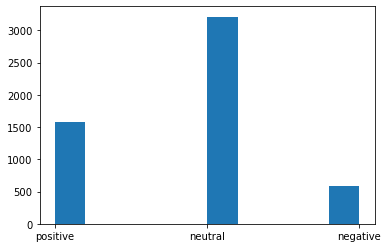

In [203]:
plt.hist(female_col.sentiment)
plt.show()

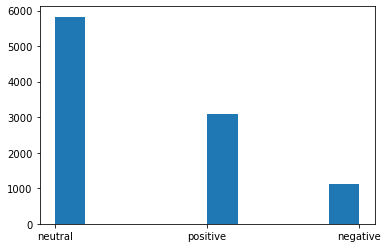

In [204]:
plt.hist(male_col.sentiment)
plt.show()

In [205]:
from spellchecker import SpellChecker
spell = SpellChecker()

In [ ]:
#find those words that may be misspelled
misspelled_words_list_female = []
for i in range(female_col.shape[0]):
    female_words_list = spell.unknown(female_col['text'].values[i].split(' '))
    for word in female_words_list:   
        misspelled_words_list_female.append(spell.correction(word))

female_typos_count = len(misspelled_words_list_female)
print("The number of typos by the female gender", female_typos_count)

In [ ]:
# find those words that may be misspelled
misspelled_words_list_male = []
for i in range(male_col.shape[0]):
    male_words_list = spell.unknown(male_col['text'].values[i].split(' '))
    for word in male_words_list:   
        misspelled_words_list_male.append(spell.correction(word))

male_typos_count = len(misspelled_words_list_male)
print("The name of typos by the male gender", male_typos_count)

In [ ]:
if female_typos_count > male_typos_count:
    print("The female gender has more typos in their tweets")

else:
    print("The male gender has more typos in their tweets")